# Лабораторная работа № 2. Статистический анализ данных и построение графиков

В работе проводится обзор основных возможностей модулей **numpy** и **pandas** для статистического анализа данных, а также их визуализации с помощью модуля **matplotlib**. 

## Цель работы

Изучить основные возможности модулей **matplotlib** и **pandas** по визуальному представлению данных. Получить навык статистической обработки данных средствами модуля **pandas**.

## Модуль matplotlib

Модуль **matplotlib** является довольно мощным средством пострения различного рода графиков. Подчас работа с ним вызывает некоторые затруднения, которые вызваны некоторыми аспектами. Этот модуль действительно обширен, **matplotlib** содержит несколько разных интерфейсов (способов построения фигуры) и может взаимодействовать с большим количеством бекендов (бекенды отвечают за то, как по факту будут отображаться диаграммы, не только за внутреннюю структуру). К тому же часть собственной документации **matplotlib** серьезно устарела. Однако понимание того, как работает этот модуль позволит избежать большинства возникающих затруднений.

Всю документацию по этому модулю и примеры его использования можно найти на [официальном сайте.](https://matplotlib.org/stable/api/pyplot_summary.html "matplotlib.org")

Импортируем модуль с помощью команды **import**. Стандартное краткое обозначение - **plt**

In [1]:
import matplotlib.pyplot as plt

Следующая магическая команда (она именно так называется!) устанавливает определенный бекенд: *inline* означает, что графики будут строится непосредственно после самого кода, т.е. будут включаться в структуру кода, а *notebook* означает, что графики будут рисоваться отдельно от того кода, который их вызвал. Это может быть полезно, например, для динамического обновления графика.

In [2]:
%matplotlib notebook 
# %matplotlib inline

**Matplotlib** основывается на иерархии объектов. Объект **Figure** – это внешний контейнер для графики, который может включать в себя несколько объектов **Axes**. Причиной сложности в понимании может быть название: **Axes** (оси), на самом деле, представляют собой то, что мы подразумеваем под индивидуальным графиком или диаграммой.

Можно рассматривать объект **Figure** как контейнер, содержащий один или несколько объектов **Axes** (настоящих графиков). Под объектами **Axes**, в порядке иерархии расположены меньшие объекты, такие как индивидуальные линии, отметки, легенды и текстовые боксы. Практически каждый «элемент» диаграммы – это собственный манипулируемый объект Python, вплоть до ярлыков и отметок.

![Figure object](https://python-scripts.com/wp-content/uploads/2018/03/figure-matplotlib.jpg "Figure object")

Для создания объекта **Figure** используется функция **subplots(figsize)**, на вход которой подается размер окна в виде объекта **tuple**. Возвращаемое значение - объект **Figure** и объекты **Axes**, находящиеся внутри объекта **Figure**.

<IPython.core.display.Javascript object>


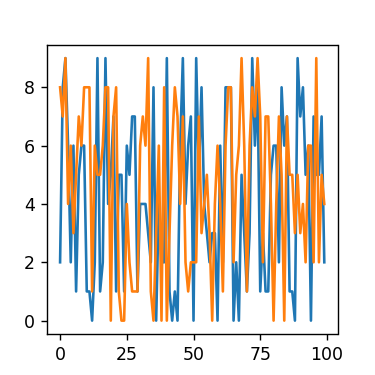

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


In [6]:
fig, ax = plt.subplots(figsize=(3,3))
print(type(fig))
print(type(ax))

Важно отметить, что есть два интерфейса работы с модулем **matplotlib**: структурированный (ориентированный на структуру) и неструктурированный (ориентированный на объект). Пример выше - структурированный подход. В этом подходе все команды стоит приписывать определенному объекту **Axes**, вызвать который можно с помощью команды **gca()** (get current axes). Пример ниже иллюстрирует, каким образом в рамках структурированного подхода можно построить простой график.

Обратите внимание, что график построился в окошке выше, к которому привязался объект **Axes**.

In [8]:
import numpy as np

ax = plt.gca()
ax.plot(np.arange(100), np.random.randint(0, 10, size=100))

Другим подходом является неструктурированный подход. Он проще в использовании, и дальнейшем мы будем пользоваться им. В рамках этого подхода текущий объект **Axes** всегда негласно подразумевается. При функции, которая создает новый объект **Axes**, фокус внимания смещается на него. Пример ниже иллюстрирует построение простого графика в рамках неструктурированного (объектно-ориентированного) подхода.

<IPython.core.display.Javascript object>


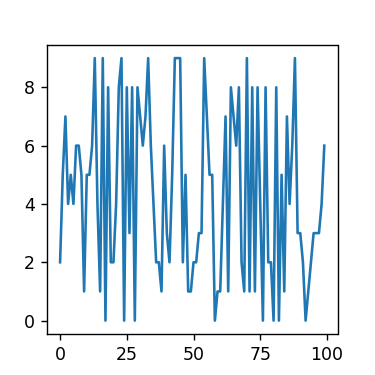

In [13]:
plt.figure(figsize = (3,3))
plt.plot(np.arange(100), np.random.randint(0, 10, size=100))
plt.show()

### Линейный график

Построить линейный график можно с помощью метода **plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12, label='line1')**. Здесь *x* - массив значений по горизонтальной оси, *y* - массив значений по вертикальной оси, *color* - цвет линии, *marker* - отображение точек ('0' - круги, 'x' - кресты и др.), *linestyle* - тип рисуемой линии (сплошная, штриховая, точечная и др.), *linewidth* - ширина линии, *markersize* - размер точек, *label* - название линии. Есть еще много других параметров, о них можно прочитать в документации.

<IPython.core.display.Javascript object>


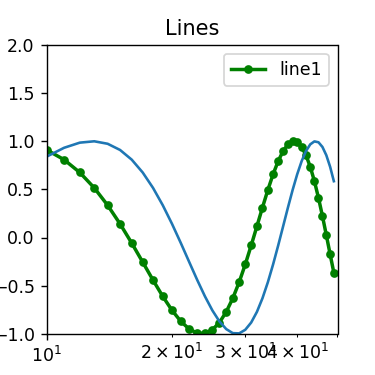

In [14]:
plt.figure(figsize = (3,3))
x = np.arange(50)
y = np.sin(x / 5)
plt.plot(x, y, color='green', marker='o', linestyle='solid', linewidth=2, markersize=4, label='line1')
plt.show()

Вызов еще одной такой же функции добавляет новую кривую на тот же график. Если параметры прорисовки линий не указывать, то они устанавливаются по умолчанию.

In [15]:
y = np.sin(x / 5 - 1)
plt.plot(x, y)

Функция **title()** устанавливает название графика, функции **xlabel()**, **ylabel()** устанавливают названия осей, функции **xlim()**, **ylim()** - диапазоны осей, **xscale()**, **yscale()** - масштабы осей (линейный, логарифмический). Функция **legend()** размещает легенду к графику в определенном место (за это отвечает параметр *loc*).

In [16]:
plt.title('Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(10, 50)
plt.ylim(-1, 2)
plt.xscale('log')
plt.legend(loc='best')

### Точечный график

Для построения точечного графика используется функция **plt.scatter(x, y, s=3, c='green', marker='+', cmap, alpha=0.5, label='scatter')**. Аргументы этой функции схожи с аргументами функции **plt.plot()**, но есть отличия. Параметр *s* задает размер маркера, *c* задает цвет, *cmap* обозначает цветовую палитру, в которую в зависимости от значения будут раскрашены точки, *alpha* задает степень прозрачности маркера (1 - непрозрачный, 0 - прозрачный).

<IPython.core.display.Javascript object>


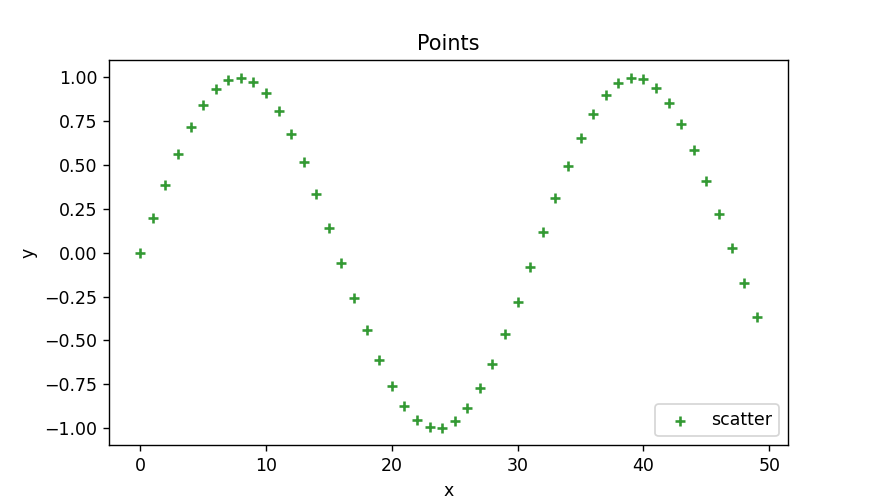

In [17]:
plt.figure(figsize = (7,4))
x = np.arange(50)
y = np.sin(x / 5)
plt.scatter(x, y, s=30, c='green', marker='+', alpha=0.8, label='scatter')
plt.title('Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()

### Несколько графиков в одном окне

Предположим, нам надо сравнить несколько различных графиков друг с другом, т.е. расположить их рядом или сгруппировать несколько графиков, чтобы они отображались в одном окне. В этом случае объекту **Figure** будут принадлежать сразу несколько объектов **Axes**. Построить такие графики можно с помощью функции **plt.subplot(nrows, ncol, num)**, *nrows* равен числу колонок в таблице из графиков, *ncol* равен числу столбцов в таблице из графиков, *num* обозначает порядковый номер графика. При этом после выполнения команды **plt.subplot()** "фокус" смещается на текущий график, и все команды, связанные с отображением данных, построения самого графика, оформления его внешнего вида, исполняются для текущего объекта **Axes**. Новая команда **plt.subplot()** с другим *num* делает активным уже другой объект **Axes**.

В примере ниже построим две кривые на соседних графиках.

<IPython.core.display.Javascript object>


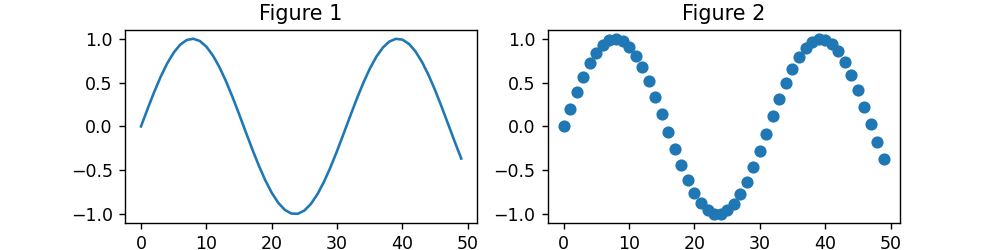

In [10]:
plt.figure(figsize = (8,2))
plt.subplot(1,2,1)
plt.title('Figure 1')
plt.plot(x, y)
plt.subplot(1,2,2)
plt.title('Figure 2')
plt.scatter(x, y)
plt.show()

### Гистограммы

Гистограммы строятся с помощью функции **plt.hist(x, bins, range=(xmin, xmax), histtype, align, orientation, color, label)**. Аргумент *x* содержит последовательность значений, по которым будет строится гистограмма, *range* определяет, в каких интервалах будут выбираться значения, *bins* равен числу столбцов в гистограмме, *color* задает цвета, *label* определеяет метки данных (названия колонок). 

Параметр *histtype* определяет тип гистограммы: *bar* - традиционная гистограмма в виде колонок/столбцов (если данные многомерные, то каждая колонка будет содержать колонки под каждую размерность), *barstacked* - в случае многомерных данных колонки будут друг над другом, *step* - отображается огибающая, *stepfilled* - отображается огибающая с заполнением.

<IPython.core.display.Javascript object>


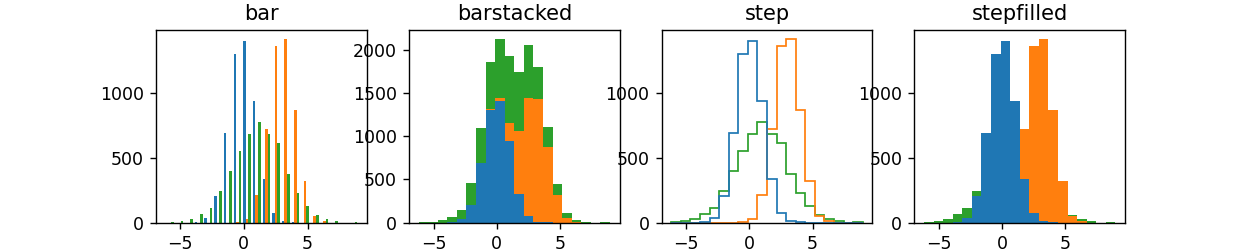

In [18]:
x1 = np.random.normal(loc=0, scale=1, size=5000)
x2 = np.random.normal(loc=3, scale=1, size=5000)
x3 = np.random.normal(loc=1, scale=2, size=5000)

plt.figure(figsize = (10,2))
plt.subplot(1,4,1)
plt.title('bar')
plt.hist([x1,x2,x3], bins=20, histtype='bar', align='mid', orientation='vertical')
plt.subplot(1,4,2)
plt.title('barstacked')
plt.hist([x1,x2,x3], bins=20, histtype='barstacked', align='mid', orientation='vertical')
plt.subplot(1,4,3)
plt.title('step')
plt.hist([x1,x2,x3], bins=20, histtype='step', align='mid', orientation='vertical')
plt.subplot(1,4,4)
plt.title('stepfilled')
plt.hist([x1,x2,x3], bins=20, histtype='stepfilled', align='mid', orientation='vertical')
plt.show()

Параметр *align* определяет выравнивание баров относительно колонок. Возможные значения: *left*, *mid*, *right*.

Параметр *orientation* принимает возможные значения *horizontal* и *vertical* и определяет пространственную ориентацию колонок.

<IPython.core.display.Javascript object>


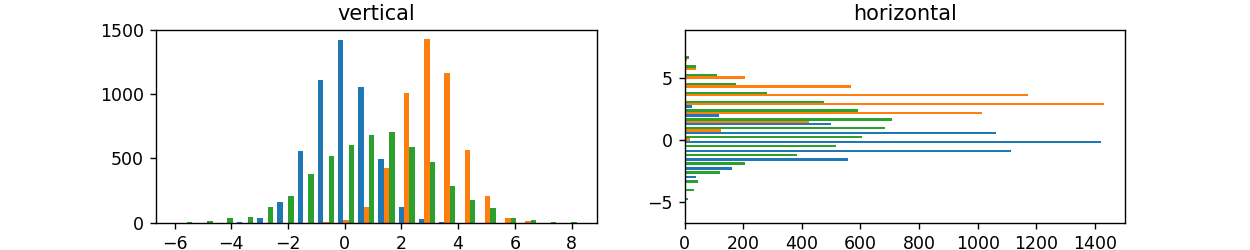

In [12]:
plt.figure(figsize = (10,2))
plt.subplot(1,2,1)
plt.title('vertical')
plt.hist([x1,x2,x3], bins=20, orientation='vertical')
plt.subplot(1,2,2)
plt.title('horizontal')
plt.hist([x1,x2,x3], bins=20, orientation='horizontal')
plt.show()

## Статистический анализ средствами модуля **pandas**

В первой лабораторной работе уже упоминался метод **describe()** классов **Series** и **DataFrame**, позволяющий получать основные статистические величины (среднее значение, стандартное отклонение, медиану и пр.) по каждой из колонок таблицы. Но иногда требуется получить какие-то другие статистические величины, только на части данных, удовлетворяющих определенному условию. Для этого можно использовать непосредственно статистические функции, являющиеся методами этих классов: *max()*, *min()*, *mode()*, *kurt()*, *median()*, *quantile()*, *skew()*, *std()*, *var()*, *diff()*, *corr()*, *autocorr()* и др. Полный список можно найти на [сайте с документацией](https://pandas.pydata.org/docs/reference/frame.html "dataframe").

Для примера создадим объект **DataFrame** c 10 колонками и заполним их равномерно распределенными значениями в интервале \[0, 1\].

In [13]:
import pandas as pd

df = pd.DataFrame(data=np.array([np.random.uniform(size=1000) for i in range(10)]).T, columns=['Var'+str(i) for i in range(10)])
df.head()

,Var0,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9
0,0.523502,0.837189,0.756955,0.551987,0.926589,0.319985,0.896756,0.815448,0.548475,0.897560
1,0.613883,0.219582,0.663013,0.355642,0.258734,0.731593,0.785302,0.155976,0.815876,0.335495
2,0.077329,0.838115,0.949413,0.962393,0.298723,0.984547,0.288137,0.826063,0.734320,0.820826
3,0.565354,0.171606,0.601753,0.558520,0.744807,0.693505,0.778259,0.540869,0.362594,0.501738
4,0.995354,0.277183,0.796362,0.035463,0.875936,0.102256,0.458631,0.810699,0.073171,0.713614


**DataFrame** имеет встроенные методы для построения графиков. Например, построим точечный график для значений первой колонки по значениям нулевой колонки с помощью метода **plot.scatter()**. Его аргументы аналогичны функции **plt.scatter()**.

<IPython.core.display.Javascript object>


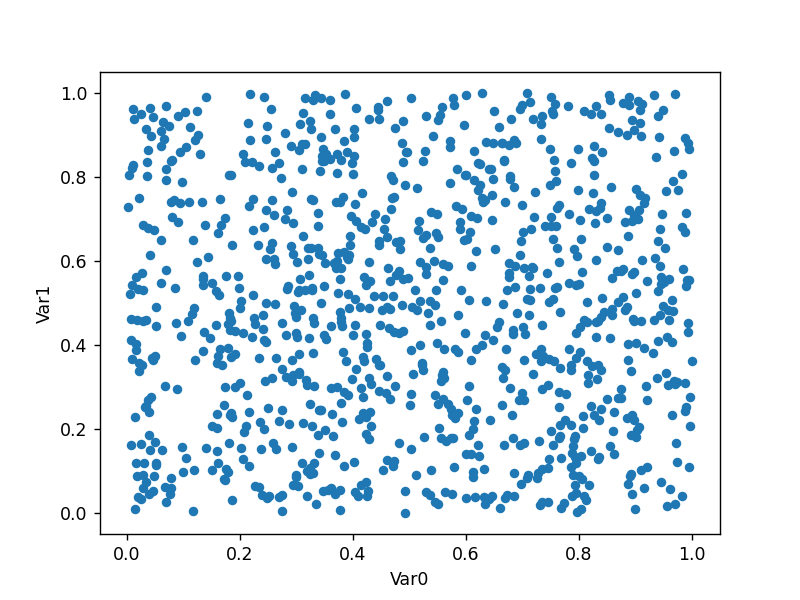

In [14]:
df.plot.scatter('Var0', 'Var1')
plt.show()

С помощью метода **plot.hist()** определим распределение величины *Var3*, а также вычислим среднее и медиану.

<IPython.core.display.Javascript object>


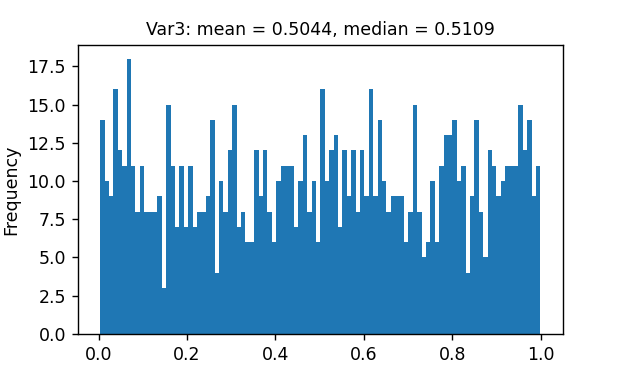

In [15]:
mean_value = df['Var3'].mean()
median_value = df['Var3'].median()

plt.figure(figsize=(5,3))
df['Var3'].plot.hist(bins=100)
plt.title('Var3: mean = {:.4f}, median = {:.4f}'.format(mean_value, median_value), size=10)
plt.show()

Есть особый тип графиков - *boxplot*, который позволяет наглядно увидеть основные перцентили распределения. Построим такие графики для всех колонок из *df*. 

Средняя линия показывает медиану (50-й перцентиль), верхняя и нижняя границы прямоугольника - 25-й и 75-й перцентиль, верхний и нижний диапазоны - минимальное и максимальное значения соответственно.

<IPython.core.display.Javascript object>


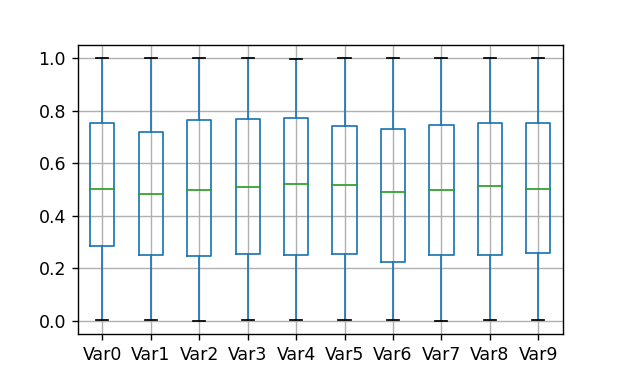

In [16]:
plt.figure(figsize=(5,3))
df.boxplot(column = list(df.columns))
plt.show()

Модуль **matplotlib** позволяет также построить двумерный график двумерной таблицы с помощью функции **matshow()**, при этом значения в таблице будут задавать цвет на двумерном графике. Например, рассчитаем попарную корреляцию Пирсона для всех колонок *df.corr()* и построим двумерный график. 

<IPython.core.display.Javascript object>


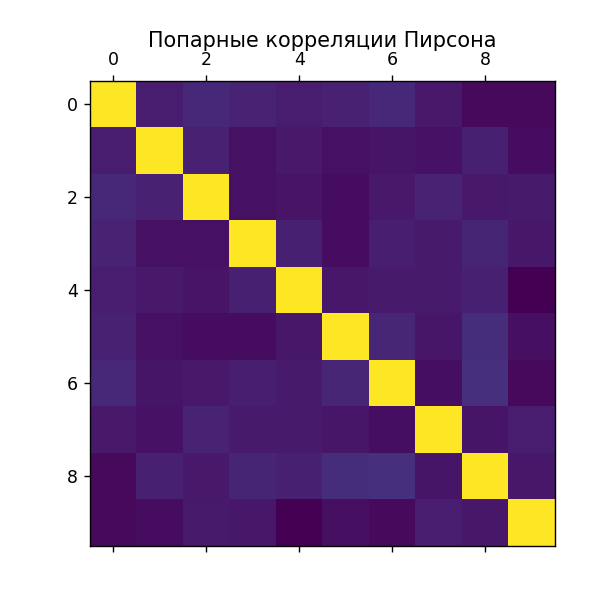

In [17]:
plt.matshow(df.corr())
plt.title('Попарные корреляции Пирсона')
plt.show()

## Задания для самостоятельной работы

1. Постройте на одном графике 4 зависимости: кубическую параболу, корень квадратный, логарифм и сигмоиду. Оформите график таким образом, чтобы разные зависимости визуально четко отличались друг от друга (изменяйте цвет, толщину линии, масштаб графика). Подпишите оси, добавьте легенду.

1. Создайте таблицу, состоящую из 50 колонок и 1000 строк. Каждая колонка должна иметь нормальное распределение с различными средними значениями и стандартными отклонениями.

1. Определите медианы и стандартные отклонения для всех колонок. 

1. Постройте 2 отдельных точечных графика в одном окне: один для медиан, второй для стандартных отклонений. Оформите график так, чтобы он выглядел аккуратно и красиво (выберите подходящий масштаб, размер шрифта, подпишите оси, добавьте названия графиков).

1. Постройте boxplot для любых 10 колонок.

1. Создайте другую таблицу, состоящую из 1000 колонок и 1000 строк. Каждая колонка должна иметь равномерное распределение в интервале от 0 до 1. 

1. Рассчитайте попарную корреляцию Пирсона всех колонок. Определите 4 пары колонок, имеющих наибольшую попарную корреляцию.

1. Постройте линейные графики этих пар в одном окне, так чтобы на каждом графике отображалась одна пара (каждая кривая своим цветом).

1. Сделайте вывод о скоррелированности этих случайных величин.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook 
%matplotlib inline

1) Постройте на одном графике 4 зависимости: кубическую параболу, корень квадратный, логарифм и сигмоиду. Оформите график таким образом, чтобы разные зависимости визуально четко отличались друг от друга (изменяйте цвет, толщину линии, масштаб графика). Подпишите оси, добавьте легенду.

In [38]:
x = np.linspace(-10, 10, num=101, endpoint=True, axis=0)
print(x)

[-10.   -9.8  -9.6  -9.4  -9.2  -9.   -8.8  -8.6  -8.4  -8.2  -8.   -7.8
  -7.6  -7.4  -7.2  -7.   -6.8  -6.6  -6.4  -6.2  -6.   -5.8  -5.6  -5.4
  -5.2  -5.   -4.8  -4.6  -4.4  -4.2  -4.   -3.8  -3.6  -3.4  -3.2  -3.
  -2.8  -2.6  -2.4  -2.2  -2.   -1.8  -1.6  -1.4  -1.2  -1.   -0.8  -0.6
  -0.4  -0.2   0.    0.2   0.4   0.6   0.8   1.    1.2   1.4   1.6   1.8
   2.    2.2   2.4   2.6   2.8   3.    3.2   3.4   3.6   3.8   4.    4.2
   4.4   4.6   4.8   5.    5.2   5.4   5.6   5.8   6.    6.2   6.4   6.6
   6.8   7.    7.2   7.4   7.6   7.8   8.    8.2   8.4   8.6   8.8   9.
   9.2   9.4   9.6   9.8  10. ]


/tmp/ipykernel_4116/2787346287.py:2: RuntimeWarning: invalid value encountered in sqrt
  sqroot = np.sqrt(x)
/tmp/ipykernel_4116/2787346287.py:3: RuntimeWarning: divide by zero encountered in log
  logr = np.log(x)
/tmp/ipykernel_4116/2787346287.py:3: RuntimeWarning: invalid value encountered in log
  logr = np.log(x)


<IPython.core.display.Javascript object>


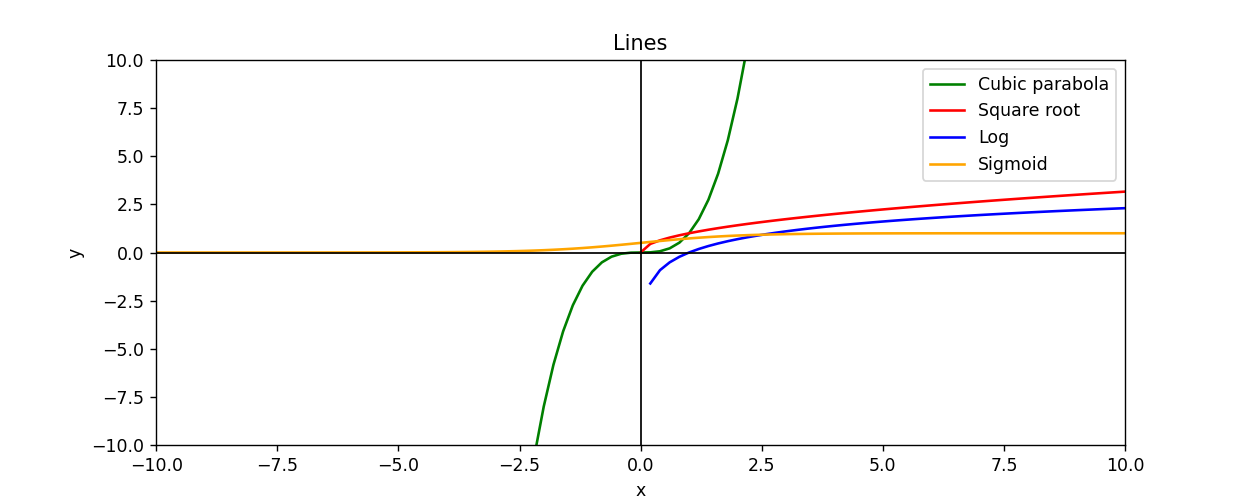

In [63]:
plt.figure(figsize = (10,4))
plt.plot(x, parabola, color='green',label='Cubic parabola')
plt.plot(x, sqroot, color='red', label='Square root')
plt.plot(x, logr, color='blue', label='Log')
plt.plot(x, sigmoid, color='orange', label='Sigmoid')
plt.show()
plt.title('Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.legend(loc='best')

2) Создайте таблицу, состоящую из 50 колонок и 1000 строк. Каждая колонка должна иметь нормальное распределение с различными средними значениями и стандартными отклонениями.

In [215]:
df = pd.DataFrame(data=np.array([np.random.normal(0,1,size=1000) for i in range(10)]).T, columns=['Var'+str(i) for i in range(10)])
# df.head(10)
df.describe()

,Var0,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.051370,0.026638,0.002807,-0.021555,0.002837,-0.016475,0.018336,-0.017933,-0.010976,0.027541
std,0.999794,1.010821,0.969363,1.019495,1.030983,0.978610,0.990997,1.020745,1.012163,0.977256
min,-2.981218,-3.587393,-3.251363,-3.038593,-3.206965,-3.174420,-2.976452,-3.361679,-3.479191,-2.866018
25%,-0.736484,-0.646270,-0.641237,-0.712724,-0.706766,-0.673420,-0.682286,-0.743675,-0.681273,-0.637270
50%,-0.034040,-0.002188,0.010463,-0.014841,0.025851,-0.040030,0.004230,-0.043970,0.015466,0.007261
75%,0.654724,0.683160,0.658776,0.643907,0.665615,0.649654,0.713290,0.649205,0.605511,0.710828
max,3.137880,3.204626,3.301050,2.709334,3.107604,2.681787,3.462148,4.239441,3.540717,2.952961


3) Определите медианы и стандартные отклонения для всех колонок. 

In [216]:
medians = []
stds = []
for column in df:
    med = np.median(df[column])
    medians.append(med)
    stddev = np.std(df[column])
    stds.append(stddev)
    print(column)
    print("Median: ", med)
    print("Std deviation: ", stddev)


Var0
Median:  -0.03403961078789959
Std deviation:  0.9992944765297875
Var1
Median:  -0.0021883964215915577
Std deviation:  1.0103156502707202
Var2
Median:  0.010462989384526795
Std deviation:  0.9688784801651794
Var3
Median:  -0.014840804502954238
Std deviation:  1.0189849292261752
Var4
Median:  0.02585069011233799
Std deviation:  1.030467773408643
Var5
Median:  -0.040030423154115424
Std deviation:  0.9781204554134159
Var6
Median:  0.004230163067017287
Std deviation:  0.9905013540103431
Var7
Median:  -0.04397044612211506
Std deviation:  1.0202349346349255
Var8
Median:  0.015466298665717564
Std deviation:  1.0116565556382249
Var9
Median:  0.007260684471022853
Std deviation:  0.9767672901022322


4) Постройте 2 отдельных точечных графика в одном окне: один для медиан, второй для стандартных отклонений. Оформите график так, чтобы он выглядел аккуратно и красиво (выберите подходящий масштаб, размер шрифта, подпишите оси, добавьте названия графиков).

<IPython.core.display.Javascript object>


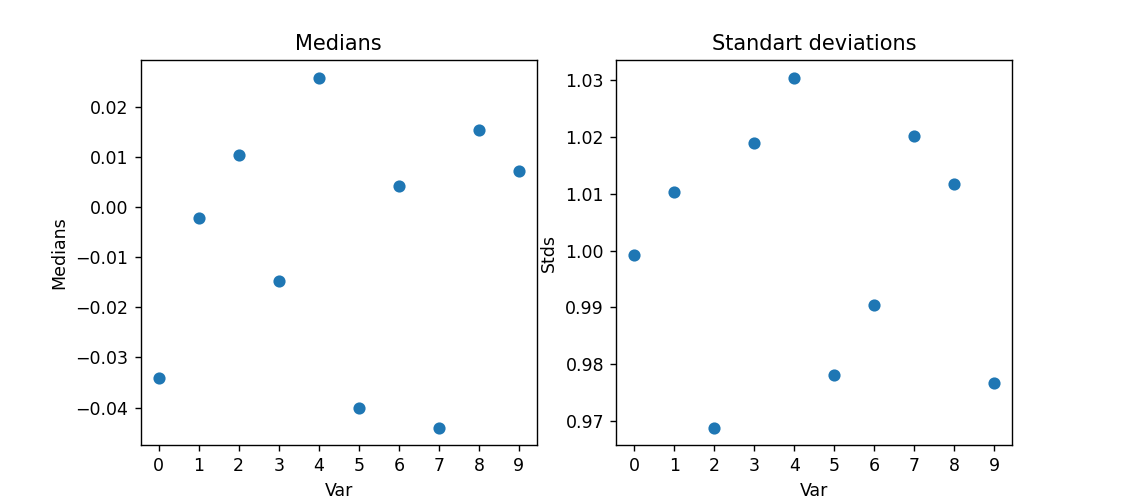

In [217]:
x = range(0,10)
plt.figure(figsize = (9,4))
plt.subplot(1,2,1)
plt.title('Medians')
plt.scatter(x,medians)
plt.xlabel('Var')
plt.ylabel('Medians')
plt.xticks(x)
plt.subplot(1,2,2)
plt.title('Standart deviations')
plt.scatter(x,stds)
plt.xlabel('Var')
plt.ylabel('Stds')
plt.xticks(x)
plt.show()

5) Постройте boxplot для любых 10 колонок.

<IPython.core.display.Javascript object>


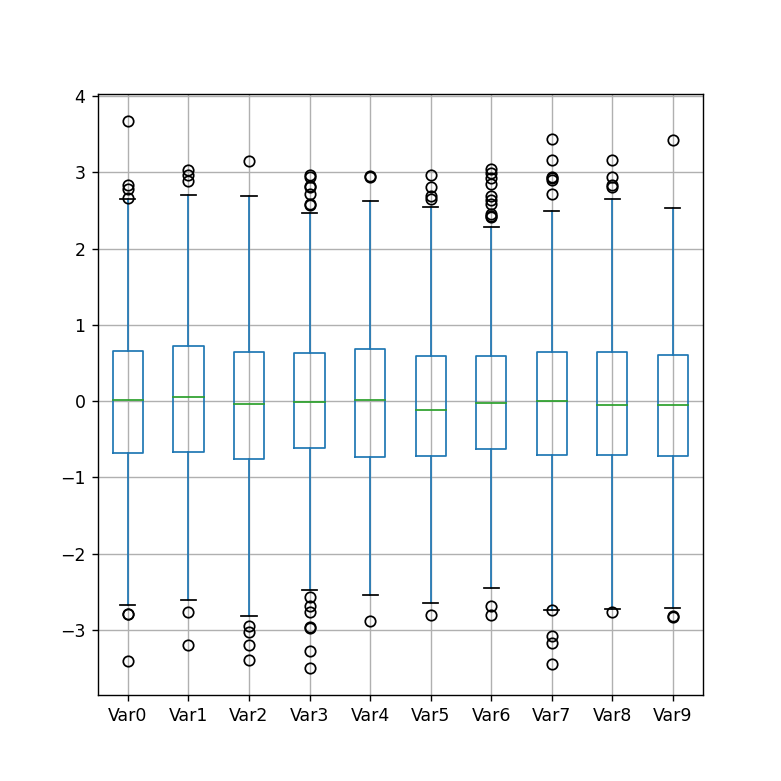

In [135]:
plt.figure(figsize=(5,5))
df.boxplot(column = list(df.columns))
plt.show()

6) Создайте другую таблицу, состоящую из 1000 колонок и 1000 строк. Каждая колонка должна иметь равномерное распределение в интервале от 0 до 1

In [136]:
df_uniform = pd.DataFrame(data=np.array([np.random.uniform(0,1,size=1000) for i in range(1000)]).T, columns=['Var'+str(i) for i in range(1000)])

7) Рассчитайте попарную корреляцию Пирсона всех колонок. Определите 4 пары колонок, имеющих наибольшую попарную корреляцию.

In [223]:
correlation = df_uniform.corr(method='pearson').abs()

In [230]:
most_correlated = correlation.unstack().sort_values(kind='quicksort',ascending=False)[1000:1008:2]

In [233]:
correlations = []
for idx, value in most_correlated.items():
    correlations.append(idx)
    print(idx, value)

('Var140', 'Var743') 0.1453669352150158
('Var910', 'Var491') 0.1451612532402944
('Var94', 'Var529') 0.14239808360049722
('Var4', 'Var514') 0.13992067876681694


8) Постройте линейные графики этих пар в одном окне, так чтобы на каждом графике отображалась одна пара (каждая кривая своим цветом).

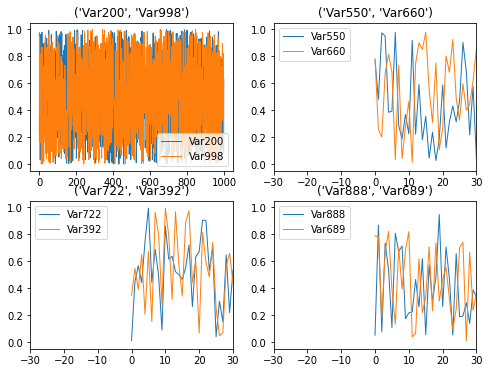

In [40]:
plt.figure(figsize = (8,6))
plt.subplot(2,2,1)
plt.title(correlations[0])
plt.plot(df_uniform[correlations[0][0]],linewidth=1, label=correlations[0][0])
plt.plot(df_uniform[correlations[0][1]],linewidth=1, label=correlations[0][1])

plt.legend(loc='best')
plt.subplot(2,2,2)
plt.title(correlations[1])
plt.plot(df_uniform[correlations[1][0]],linewidth=1, label=correlations[1][0])
plt.plot(df_uniform[correlations[1][1]],linewidth=1, label=correlations[1][1])
plt.xlim(-30,30)
plt.legend(loc='best')
plt.subplot(2,2,3)
plt.title(correlations[2])
plt.plot(df_uniform[correlations[2][0]],linewidth=1, label=correlations[2][0])
plt.plot(df_uniform[correlations[2][1]],linewidth=1, label=correlations[2][1])

plt.xlim(-30,30)
plt.legend(loc='best')
plt.subplot(2,2,4)
plt.title(correlations[3])
plt.plot(df_uniform[correlations[3][0]],linewidth=1, label=correlations[3][0])
plt.plot(df_uniform[correlations[3][1]],linewidth=1, label=correlations[3][1])
plt.xlim(-30,30)

plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


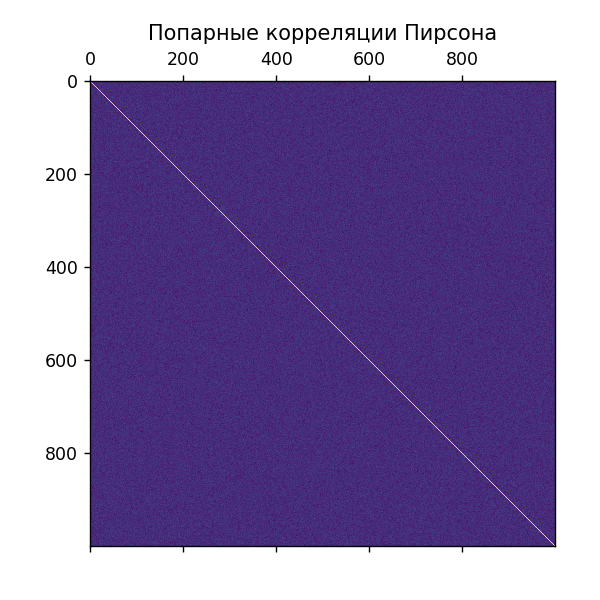

In [235]:
plt.matshow(df_uniform.corr(method='pearson'))
plt.title('Попарные корреляции Пирсона')
plt.show()

9) Сделайте вывод о скоррелированности этих случайных величин.


По данным графикам невозможно судить и корреляции. Аналитически коэффициент корреляции получился очень низким ~0.14, поэтому можно сделать вывод, что корреляция для данных колок отсутствует

## Список литературы

- Модуль **pandas** [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/ "pandas")
- Модуль **matplotlib** [https://matplotlib.org/stable/api/pyplot_summary.html](https://matplotlib.org/stable/api/pyplot_summary.html "matplotlib")